In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datamunge/sign-language-mnist")

print("Path to dataset files:", path)




/Users/user/PyCharmMiscProject/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/user/.cache/kagglehub/datasets/datamunge/sign-language-mnist/versions/1


In [2]:
train_path = "/Users/user/.cache/kagglehub/datasets/datamunge/sign-language-mnist/versions/1/sign_mnist_train.csv"
test_path = "/Users/user/.cache/kagglehub/datasets/datamunge/sign-language-mnist/versions/1/sign_mnist_test.csv"

import pandas as pd

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [3]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Extract features and labels
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

# Reshape and normalize to [0,1]
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode labels (25 classes)
y_train = to_categorical(y_train, num_classes=25)
y_test = to_categorical(y_test, num_classes=25)


2025-11-11 11:18:17.349941: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(28, 28, 1)),  # Explicit Input layer
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(25, activation='softmax')

])

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val)
)


Epoch 1/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - accuracy: 0.4396 - loss: 1.8116 - val_accuracy: 0.8580 - val_loss: 0.5787
Epoch 2/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - accuracy: 0.7866 - loss: 0.6461 - val_accuracy: 0.9417 - val_loss: 0.2537
Epoch 3/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - accuracy: 0.8789 - loss: 0.3583 - val_accuracy: 0.9803 - val_loss: 0.0934
Epoch 4/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.9191 - loss: 0.2404 - val_accuracy: 0.9949 - val_loss: 0.0460
Epoch 5/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.9386 - loss: 0.1756 - val_accuracy: 0.9982 - val_loss: 0.0181
Epoch 6/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.9552 - loss: 0.1344 - val_accuracy: 0.9985 - val_loss: 0.0105
Epoch 7/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.9605 - loss: 0.1148 - val_accuracy: 1.0000 - val_loss: 0.0049
Epoch 8/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.9670 - loss: 0.0926 - 

In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')


225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9292 - loss: 0.2740
Test Accuracy: 0.9292


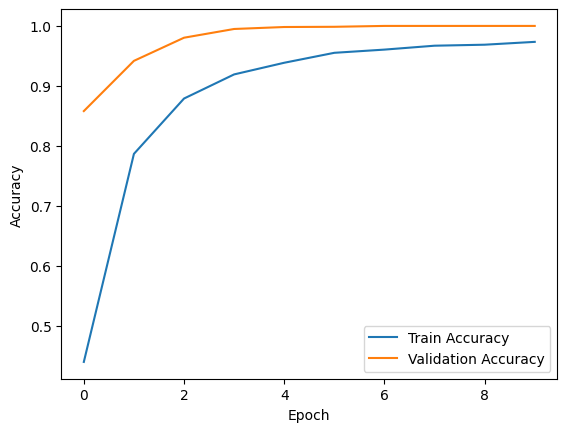

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [10]:
model.save('sign_language_cnn_model.h5')


In [11]:
from tensorflow.keras.models import load_model

model = load_model('sign_language_cnn_model.h5')


In [12]:
alphabet = [chr(i) for i in range(65, 91) if chr(i) not in ['J', 'Z']]


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(28, 28, 1)),  # Explicit Input layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(25, activation='softmax')
])

# Compile with a new optimizer instance
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Then call fit(...)

import tensorflow as tf
tf.config.run_functions_eagerly(True)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1
)

datagen.fit(X_train)


In [21]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=10,
    validation_data=(X_val, y_val)
)


Epoch 1/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 95s 244ms/step - accuracy: 0.2593 - loss: 2.4159 - val_accuracy: 0.7706 - val_loss: 0.9601
Epoch 2/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 104s 268ms/step - accuracy: 0.5606 - loss: 1.3379 - val_accuracy: 0.8765 - val_loss: 0.4831
Epoch 3/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 147s 381ms/step - accuracy: 0.6723 - loss: 0.9830 - val_accuracy: 0.9370 - val_loss: 0.2997
Epoch 4/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 458s 1s/step - accuracy: 0.7267 - loss: 0.8059 - val_accuracy: 0.9443 - val_loss: 0.2140
Epoch 5/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 255s 545ms/step - accuracy: 0.7631 - loss: 0.6932 - val_accuracy: 0.9621 - val_loss: 0.1497
Epoch 6/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 141s 365ms/step - accuracy: 0.7894 - loss: 0.6065 - val_accuracy: 0.9818 - val_loss: 0.1056
Epoch 7/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 132s 341ms/step - accuracy: 0.8092 - loss: 0.5550 - val_accuracy: 0.9829 - val_loss: 0.0853
Epoch 8/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 97s 251ms/step - accuracy: 0.8254 - loss

In [22]:
import cv2
import numpy as np
import mediapipe as mp
from tensorflow.keras.models import load_model

# Load your trained CNN model
model = load_model('sign_language_cnn_model.h5')

# Mapping indices to alphabets (A-Y, excluding J,Z)
alphabet = [chr(i) for i in range(65, 91) if chr(i) not in ['J', 'Z']]

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False,
                       max_num_hands=1,
                       min_detection_confidence=0.7,
                       min_tracking_confidence=0.7)
mp_draw = mp.solutions.drawing_utils

def preprocess_hand_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (28, 28))
    img = img / 255.0
    return img.reshape(1, 28, 28, 1)

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Flip frame horizontally for natural interaction
    frame = cv2.flip(frame, 1)
    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process frame with MediaPipe Hands
    result = hands.process(img_rgb)

    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            # Draw hand landmarks on frame
            mp_draw.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Get bounding box around hand
            h, w, _ = frame.shape
            x_coords = [landmark.x for landmark in hand_landmarks.landmark]
            y_coords = [landmark.y for landmark in hand_landmarks.landmark]
            xmin, xmax = int(min(x_coords) * w), int(max(x_coords) * w)
            ymin, ymax = int(min(y_coords) * h), int(max(y_coords) * h)

            # Add margin around bounding box
            margin = 20
            xmin = max(0, xmin - margin)
            ymin = max(0, ymin - margin)
            xmax = min(w, xmax + margin)
            ymax = min(h, ymax + margin)

            # Crop hand region from frame
            hand_img = frame[ymin:ymax, xmin:xmax]

            if hand_img.size != 0:
                # Preprocess hand image and predict sign
                input_img = preprocess_hand_image(hand_img)
                pred_prob = model.predict(input_img)
                pred_class = np.argmax(pred_prob)
                pred_letter = alphabet[pred_class]

                # Display predicted letter near hand
                cv2.putText(frame, f'Predicted: {pred_letter}', (xmin, ymin - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow("Hand Sign Recognition with MediaPipe", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


ModuleNotFoundError: No module named 'cv2'